**Importamos librerias**

In [11]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [12]:
# Cargar datos
data = pd.read_csv('temperaturas.csv')

# Convertir la columna 'DATE' a datetime
data['DATE'] = pd.to_datetime(data['DATE'])

In [13]:
# Extraer componentes de la fecha, como el año y el día del año
data['Year'] = data['DATE'].dt.year
data['DayOfYear'] = data['DATE'].dt.dayofyear

# Convertir la fecha a un número entero de días desde la fecha mínima
data['DaysSinceMin'] = (data['DATE'] - data['DATE'].min()).dt.days

# Preparar la matriz de características para el clustering
X = data[['DaysSinceMin', 'TMAX']].values

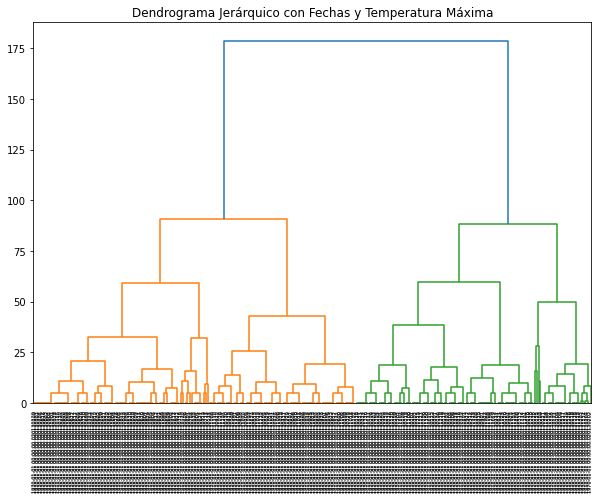

In [15]:

# Realizar el clustering jerárquico
linked = linkage(X, 'average')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=data['DATE'].astype(str).values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrograma Jerárquico con Fechas y Temperatura Máxima')
plt.show()

# Decidir el número de clústeres basado en el dendrograma y aplicar el modelo
clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
clustering.fit(X)

# Añadir la asignación de clústeres al DataFrame
data['Cluster'] = clustering.labels_

# Calcular y mostrar las métricas de evaluación
silhouette_avg = silhouette_score(X, clustering.labels_)
davies_bouldin = davies_bouldin_score(X, clustering.labels_)
calinski_harabasz = calinski_harabasz_score(X, clustering.labels_)

print(f"Coeficiente de Silueta: {silhouette_avg}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")


In [16]:
# Decidir el número de clústeres basado en el dendrograma y aplicar el modelo
clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
clustering.fit(X)

# Añadir la asignación de clústeres al DataFrame
data['Cluster'] = clustering.labels_

In [17]:
# Calcular y mostrar las métricas de evaluación
silhouette_avg = silhouette_score(X, clustering.labels_)
davies_bouldin = davies_bouldin_score(X, clustering.labels_)
calinski_harabasz = calinski_harabasz_score(X, clustering.labels_)

print(f"Coeficiente de Silueta: {silhouette_avg}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silueta: 0.5374773222667218
Índice de Davies-Bouldin: 0.4958876639995511
Índice Calinski-Harabasz: 1377.3121937793042
